In [19]:
#| default_exp programmatic_access

In [20]:
#| hide
from nbdev.showdoc import *
import nbdev
from nbdev import nbdev_export

In [21]:
#| export
import numpy as np
import pyproj
import matplotlib.path as path
import s3fs
import zarr
import matplotlib.pyplot as plt
import scipy
from datetime import timedelta
from tqdm import tqdm
import xarray as xr
import re
import pandas as pd
import geopandas as gpd
import matplotlib.path as mplp
import ipyleaflet as ipyl
from ipyleaflet import WMSLayer
import ipywidgets as ipyw
import json
import pandas as pd
from ipyleaflet import Map, WMSLayer, basemaps, GeoData, AwesomeIcon, Marker, Polygon
from ipywidgets import HTML, widgets
from owslib.wms import WebMapService
import ipywidgets as widgets
from ipywidgets import Label, VBox
from owslib.wfs import WebFeatureService
from requests import Request
import urllib.request, json 

In [73]:
#| export
from ITS_LIVE_TOOL import obj_setup

What if we already know what glacier / point we'd like to select, or we want to select a predefined, precise point, or several points? We provide programmatic access sequences for these situations where the interactive widget is not needed. For these, the following information is needed:
- **Glacier name** (this is a string you specify, it can be the formal glacier name (if it has one) or your own label
- **RGI ID**
- local UTM zone*


*note, this is short-term, soon we will implement a fix where you do not need to pass UTM zone

In [64]:
#| hide

point = [76.36013929649597, 35.73912785079385]
rgiid = 'RGI60-14.06794'
utm = 'EPSG:32643'

In [65]:
#| export
def create_glacier_obj(label, rgi_id, utm_zone):

    glacier = obj_setup.Glacier(label, rgi_id, utm_zone, 'manual')

    return glacier
    

In [66]:
#| export
def create_glacier_point_obj(point_coords, label, rgi_id):

    point = obj_setup.Glacier_Point(label, label, rgi_id, point_coords)
    return point

In [67]:
#| export
def create_glacier_centerline_obj(label, rgi_id):

    centerline = obj_setup.Glacier_Centerline(label, rgi_id)
    return centerline

In [68]:
#| hide
glacier = create_glacier_obj('label',rgiid, utm)

In [69]:
#| hide

glacier_pt = create_glacier_point_obj(point, 'label', rgiid)

original xy [76.36013929649597, 35.73912785079385] 4326 maps to datacube (622992.2829075075, 3955867.335135076) EPSG:32643
subset and load at   3.14 seconds


In [70]:
#| hide

glacier_centerline = create_glacier_centerline_obj('label', rgiid)

<Axes: >

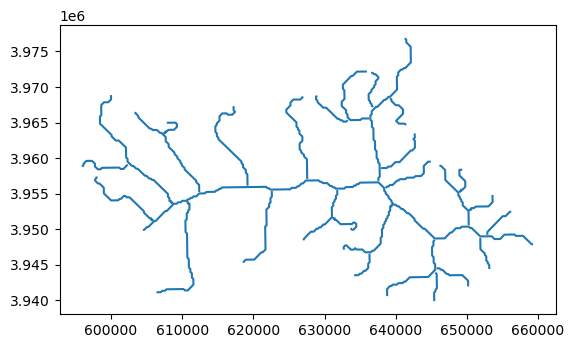

In [71]:
#| hide

glacier_centerline.centerlines.plot()

<Axes: >

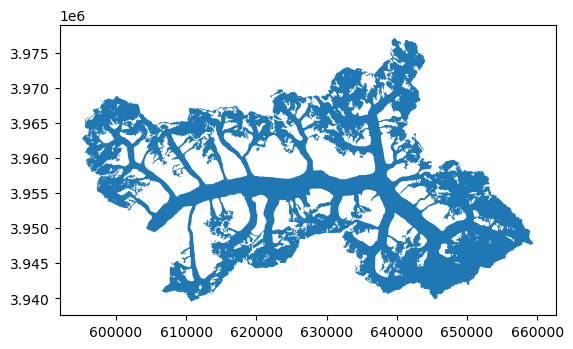

In [72]:
glacier.outline_prj.plot()